First we will explore our data set that was exposed by the sklearn package

In [282]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")
print("mglearn version: 0.1.9")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.1
mglearn version: 0.1.9
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0
mglearn version: 0.1.9


## Load the Dataset

In [283]:
from sklearn.datasets import load_iris

dataset = load_iris()

## Explore the data

In [284]:
# Explore the dataset
print("Description {}".format(dataset.DESCR))
print("Filename {}".format(dataset.filename))
print("Label Names {}".format(dataset.target_names))
print("Label Vector {}".format(dataset.target))
print("Feature Names {}".format(dataset.feature_names))
# anonymous function to format the data to 2 decimal places
withFormatter = lambda x: "{:.2f}".format(x);
# create a function that will apply the anonymous function to each element in the matrix
float_formatter = np.vectorize(withFormatter)
print("Formatted Data {}".format(float_formatter(dataset.data)))
print("Unformatted Data {}".format(dataset.data))
print("Data Shape {}".format(dataset.data.shape))

Description .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= =====

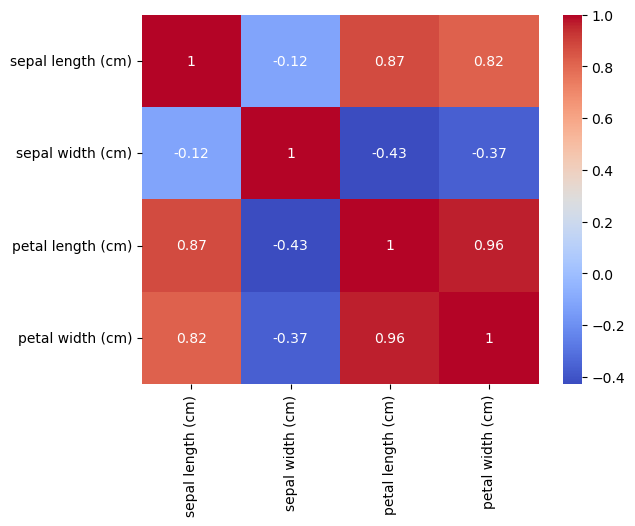

In [285]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

import seaborn as sns
# Visually include the correlation coefficient in each cell of the correlation matrix
include_correlation_coefficient_in_each_cell = True
# coolwarm is a color map that indicates the strength of the relationship
# between each feature using a color gradient from blue to red.
color_map = 'coolwarm'
# Correlation matrix
correlation_matrix = df.corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,
    annot=include_correlation_coefficient_in_each_cell,
    cmap=color_map
);

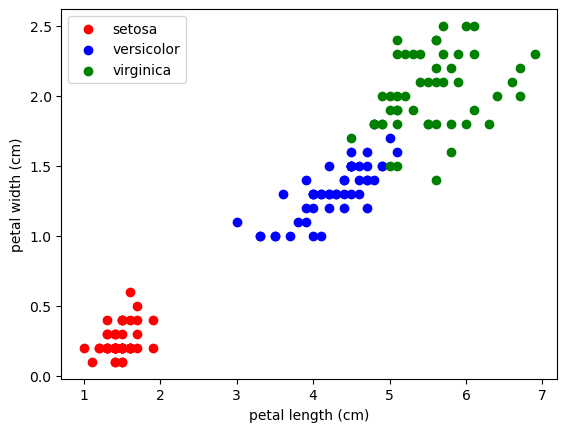

In [286]:
import matplotlib.pyplot as plt
# set of ticks in the color bar
ticks = [i for i, class_name in enumerate(dataset.target_names)]
# plot the instances colored by the class label
color_map = {0: 'red', 1: 'blue', 2: 'green'}
colors = [color_map[c] for c in dataset.target]
for i, class_name in enumerate(dataset.target_names):
    plt.scatter(
        df.loc[dataset.target == i, "petal length (cm)"],
        df.loc[dataset.target == i, "petal width (cm)"],
        c=color_map[i],
        label=class_name
    )
# add a color bar to indicate which color corresponds to which class
plt.legend()
# label the axes
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

## Perform supervised learning algorithm

In [287]:
from sklearn.neighbors import KNeighborsClassifier
# construct an instance of a K-Nearest Neighbor classifier with the most effective value of k
supervised_classifier = KNeighborsClassifier(n_neighbors=3)
# train the classifier on the training set
supervised_classifier.fit(dataset.data, dataset.target)
# produce a vector of labels arrived at by the classifier using the testing data
y_pred = supervised_classifier.predict(dataset.data)

## Prepare Data for Semi-Supervised Learning
Our entire dataset is labeled.  
We want to simulate a subset of the instances are unlabeled


In [288]:
random_number_generator = np.random.RandomState(0)
y_rand = random_number_generator.rand(dataset.target.shape[0])

# labeled and unlabeled vector
y_label_vector_with_missing_labels = np.copy(dataset.target)
# set random samples to be unlabeled
y_label_vector_with_missing_labels[y_rand < 0.3] = -1


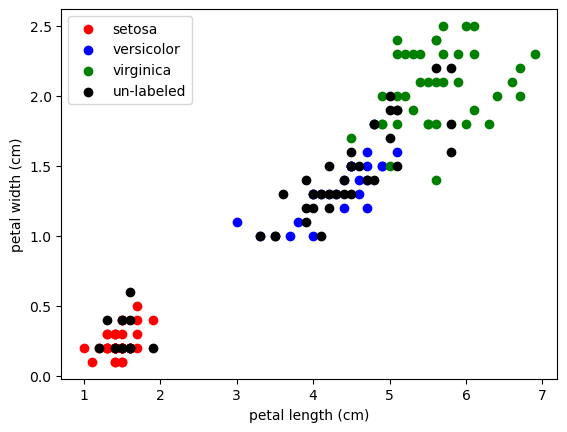

In [289]:
color_map = {-1: 'black', 0: 'red', 1: 'blue', 2: 'green'}
colors = [color_map[c] for c in y_label_vector_with_missing_labels]
all_classes = np.append(dataset.target_names, 'un-labeled')
for i, class_name in enumerate(all_classes):
    encoded_label_value = i if i < 3 else -1
    plt.scatter(
        df.loc[y_label_vector_with_missing_labels == encoded_label_value, "petal length (cm)"],
        df.loc[y_label_vector_with_missing_labels == encoded_label_value, "petal width (cm)"],
        c=color_map[encoded_label_value],
        label=class_name
    )
# add a color bar to indicate which color corresponds to which class
plt.legend()
# label the axes
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

In [290]:
# create helper function to compare the performance of various semi-supervised techniques
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a dictionary to store the performance metrics of each model
performance_metrics = {}

def record_performance(optimization_technique_name, y_true, y_pred, description):
    """
    Add the performance metrics of the model to the dictionary
    keyed by the optimization technique name so we can compare the results of each model.

    Parameters:
        optimization_technique_name (str): short name of the optimization technique
        regression_results_wrapper (statsmodels.regression.linear_model.RegressionResultsWrapper): the performance results of a linear model.
        description (str): description of the optimization technique
    """
    performance_metrics[optimization_technique_name] = {
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1-score': f1_score(y_true, y_pred, average='macro'),
        'description': description
    }

record_performance('supervised', dataset.target, y_pred, 'supervised learning')

## Perform Semi-Supervised Learning Techniques

In [291]:
X = df[['petal length (cm)', 'petal width (cm)']]

X = X.rename(columns={'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})

X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [292]:
# Label Spreading
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
# Controls the amount of influence labeled points have on label propagation
clamping_factor = 0.5
# larger value of gamma the kernel is more sensitive to the distance between points
width_of_kernel = 100
label_spreading = LabelSpreading(
    kernel="rbf",
    gamma=width_of_kernel,
    alpha=clamping_factor,
    max_iter=100
)
label_spreading.fit(X, y_label_vector_with_missing_labels)
y_pred = label_spreading.predict(X)
record_performance('label_spreading', dataset.target, y_pred, 'label spreading')

In [293]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['rbf', 'knn'],
    'gamma': [20, 100],
    'alpha': [0.2, 0.5]
}
number_of_folds = 5
grid_search = GridSearchCV(LabelSpreading(), param_grid, cv=number_of_folds)
grid_search.fit(X, y_label_vector_with_missing_labels)
label_spreading = LabelSpreading(**grid_search.best_params_)
label_spreading.fit(X, y_label_vector_with_missing_labels)
y_pred = label_spreading.predict(X)
record_performance('label_spreading_hyperparameter_tuning', dataset.target, y_pred, 'label spreading with hyperparameter tuning')


In [294]:
from sklearn.svm import SVC
param_grid = {
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10],
    'probability': [True]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=number_of_folds)
grid_search.fit(X, y_label_vector_with_missing_labels)
svm_classifier = SVC(**grid_search.best_params_)
self_training_classifier = SelfTrainingClassifier(svm_classifier)
self_training_classifier.fit(X, y_label_vector_with_missing_labels)
y_pred = self_training_classifier.predict(X)
record_performance('self_training_with_hyperparameter_tuning', dataset.target, y_pred, 'Self training with hyperparameter tuning')

## Compare Performance of Techniques

In [295]:
# Pretty print the dataframe using the dictionary keys as the row names and the dictionary values as the column values
orient_frame_with_key_value_pairs_as_rows = 'index'

# Remove the column width constraint so the entire description is displayed instead of being truncated with ellipsis
pd.set_option('display.max_colwidth', None)
# create a dataframe from the dictionary of performance metrics using the dictionary keys as the row names
pd.DataFrame.from_dict(performance_metrics, orient=orient_frame_with_key_value_pairs_as_rows)

,precision,recall,f1-score,description
supervised,0.960000,0.960000,0.960000,supervised learning
label_spreading,0.973333,0.973333,0.973333,label spreading
label_spreading_hyperparameter_tuning,0.960000,0.960000,0.960000,label spreading with hyperparameter tuning
self_training_with_hyperparameter_tuning,0.954369,0.953333,0.953291,Self training with hyperparameter tuning


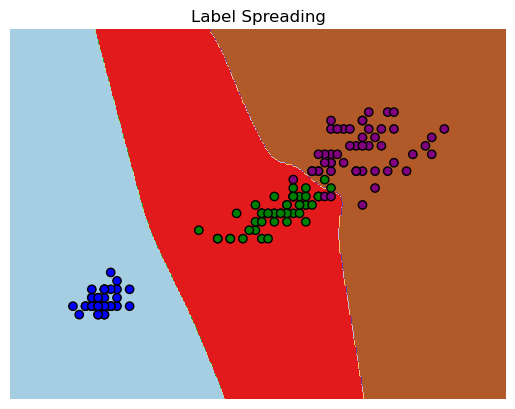

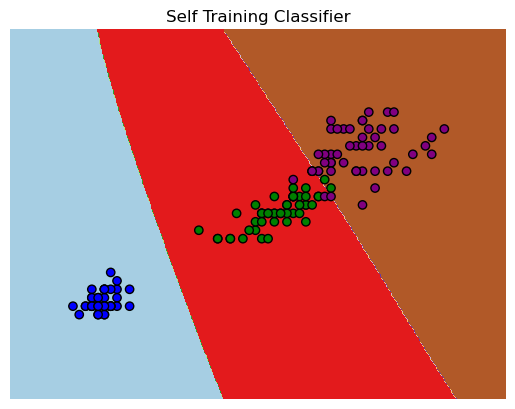

In [297]:
h = 0.02
def plot_decision_boundary(classifier, title):
    x_min, x_max = X['petal_length'].min() - 1, X['petal_length'].max() + 1
    y_min, y_max = X['petal_width'].min() - 1, X['petal_width'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    color_map = {
        -1: 'red',
        0: 'blue',
        1: 'green',
        2: 'purple'
    }
    # retrain on the same features, but without feature names to avoid this warning:
    # X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
    classifier.fit(dataset.data[:, -2:], y_label_vector_with_missing_labels)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in dataset.target]
    plt.scatter(X['petal_length'], X['petal_width'], c=colors, edgecolors="black")

    plt.title(title)
    plt.show()

plot_decision_boundary(label_spreading, 'Label Spreading')
plot_decision_boundary(self_training_classifier, 'Self Training Classifier')